An example for reading the TFrecords format data. It should be combined into the InputPipeline class later.

In [1]:
import tensorflow as tf
Len = 4000

In [2]:
def parse_fn(example):
    "Parse TFExample records and perform simple data augmentation."
    example_fmt = {
        "index": tf.FixedLenFeature([], tf.int64),
        "feature_raw": tf.FixedLenFeature([Len], tf.float32),
        "label_raw": tf.FixedLenFeature([], tf.float32)
    }
    parsed = tf.parse_single_example(example, example_fmt)
    feature = parsed['feature_raw']
    label = parsed['label_raw']
    #-------------preprocessing--------------
    feature = tf.reshape(feature, [Len])
    label = tf.reshape(label, [])
    #-------------preprocessing--------------
    return feature, label

In [3]:
def input_fn():
    filenames = '/data/dell5/userdir/maotx/DSC/data/test.tfrecords'
    dataset = tf.data.TFRecordDataset(filenames)
#   dataset = dataset.shuffle(buffer_size=FLAGS.shuffle_buffer_size)
    dataset = dataset.map(parse_fn)
    dataset = dataset.repeat(2)
    dataset = dataset.batch(batch_size=10)
    iterator = dataset.make_initializable_iterator()
    tf.add_to_collection('iterator',iterator)
    next_element = iterator.get_next()
    return next_element

The following are some simple tests.

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
(10, 4000) (10,)


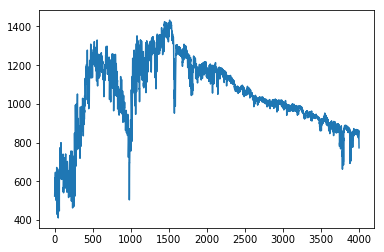

(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10,)
(10, 4000) (10

In [4]:
import matplotlib.pyplot as plt
import numpy as np
dataset_test = input_fn()

with tf.train.MonitoredTrainingSession() as sess:
    sess.run(tf.get_collection('iterator')[0].initializer)
    features_records, labels_records = sess.run(dataset_test)
    print features_records.shape, labels_records.shape
    plt.plot(features_records[5])
    plt.show()
    # boundary test
    for i in xrange(100):
        t1, t2 = sess.run(dataset_test)
        print t1.shape, t2.shape

In [5]:
data = np.load('/home/maotx/git/DSclassify/data/small_flux_resample.npy')
features_np = data['flux'][:10]
labels_np = data['label'][:10]
print np.allclose(features_np, features_records)
print np.allclose(labels_np, labels_records)

True
True
